In [ ]:
import sys
import os

# 프로젝트 루트 추가 (노트북이 있는 디렉토리)
project_root = os.path.dirname(os.path.abspath("__file__")) if "__file__" in globals() else os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import time
import functools
def benchmark_runtime_decorator(func):
    @functools.wraps(func)
    def wrapper_benchmark_runtime(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        elapsed_minute = int(elapsed_time / 60) if elapsed_time >= 60 else None
        print(f"Function '{func.__name__}' executed in {f"{elapsed_minute} minutes " if elapsed_minute else ""}{elapsed_time:.4f} seconds")
        return result

    return wrapper_benchmark_runtime

In [5]:
from typing import cast
from workflow.rag_agent_workflow_part2 import app_part2, AgentState

initial_state = {
    "job_id": "test_job_001",
    "task_id": "test_task_001",
    "job_info": {
        "description": "정보유출 의심 사례 분석",
        "pc_username": "이정호",
        "pc_userrank": "주임",
        "pc_usercompany": "한국정보보호산업협회"
    },
    "collection_name": "artifacts_collection",
    "db_config": None,
    "filtered_artifacts": [],  # Part 1에서 필터링된 아티팩트 (실제로는 데이터 있음)
    "data_save_status": "success",
    "raw_user_requirements": """
사내에서 활용되는 교육생 개인정보유출 의심 활동을 분석해주세요.
이정호 주임은 한국정보보호산업협회에서 교육프로그램 운영 실무자로, 보안 전문가 육성 관련 프로그램을 기획하고 진행하는 업무를 합니다. 따라서 기존 업무의 특성을 고려하여 정보를 수집해 주세요."""
}


print("📝 초기 상태:")
print(f"  - Job ID: {initial_state['job_id']}")
print(f"  - Task ID: {initial_state['task_id']}")
print(f"  - 사용자 요구사항: {initial_state['raw_user_requirements']}")
print(f"  - 컬렉션: {initial_state['collection_name']}")

📝 초기 상태:
  - Job ID: test_job_001
  - Task ID: test_task_001
  - 사용자 요구사항: 
사내에서 활용되는 교육생 개인정보유출 의심 활동을 분석해주세요.
이정호 주임은 한국정보보호산업협회에서 교육프로그램 운영 실무자로, 보안 전문가 육성 관련 프로그램을 기획하고 진행하는 업무를 합니다. 따라서 기존 업무의 특성을 고려하여 정보를 수집해 주세요.
  - 컬렉션: artifacts_collection


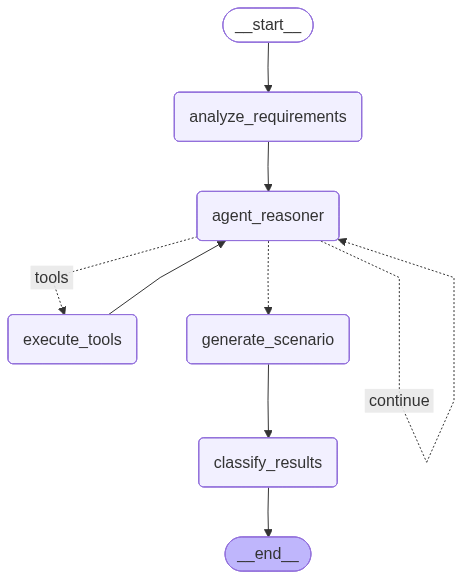

In [6]:
from IPython.display import Image, display
display(Image(app_part2.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
@benchmark_runtime_decorator
def invoke_app(initial_state):
    final_state = app_part2.invoke(
        initial_state,
        config={"recursion_limit": 80}  # 재귀 제한 증가
    )  # type: ignore

    return final_state

try:
    initial_state = cast(AgentState, initial_state)
    # 워크플로우 실행
    print("🚀 워크플로우 실행 시작...\n")
    final_state = invoke_app(initial_state)
    print("\n" + "="*60)
    print("✅ 워크플로우 실행 완료!")
    print("="*60 + "\n")
        
except Exception as e:
    print(f"\n❌ 오류 발생: {e}")
    import traceback
    traceback.print_exc()

🚀 워크플로우 실행 시작...

--- 📋 Node: 요구사항 분석 중... ---
  ✅ 요구사항 분석 완료
     - 사용자 요구사항: 2201자
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 2개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---
--- 🔎 Tool: 통합 검색 실행 ---
  🧠 Step 1/2: 검색 쿼리 최적화 중...
--- 🧠 Tool: 검색 쿼리 계획 중 ---
  📊 메타데이터 분석 중...
  ✅ 메타데이터 분석 완료:
     - 전체 아티팩트: 2,455개
     - Artifact Types: 10개, ['Discord.files_data', 'Edge.downloads_data', 'Edge.downloads_url_chains_data', 'Edge.urls_data', 'Edge.visited_links_data', 'Edge.visits_data', 'KakaoTalk.files_data', 'lnk_files_data', 'recycle_bin_files_data', 'usb_devices_data']
     - 시간 범위: 2025-04-04T13:29:22 ~ 2025/09/30 14:50:02.120
  ✅ 쿼리 생성 완료:
     - query_text: 교육생 개인정보 유출 클라우드 스토리지 웹메일 파일 공유 업로드 접속
     - 1차 필터:
       • artifact_types: ['Edge.urls_data', 'Edge.visits_data', 'Edge.visited_links_data', 'Edge.downloads_data', 'Edge.downloads_url_chains_data']
       • datetime: (없음) ~ (없음)
     - 2차 검색:
       • max_results: 100
       • similarity_threshold: 0.5
 

E0000 00:00:1760874636.029496 4686956 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


  📊 1차 필터 통과: 200개
  📊 2차 필터 (유사도 0.5) 통과: 0개
  ✅ 0개 검색 완료 (요청: 100개, 유사도 임계값 0.5로 필터링)
  ✅ 통합 검색 완료: 0개 발견
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 4개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---
--- 🔎 Tool: 통합 검색 실행 ---
  🧠 Step 1/2: 검색 쿼리 최적화 중...
--- 🧠 Tool: 검색 쿼리 계획 중 ---
  📊 메타데이터 분석 중...
  ✅ 메타데이터 분석 완료:
     - 전체 아티팩트: 2,455개
     - Artifact Types: 10개, ['Discord.files_data', 'Edge.downloads_data', 'Edge.downloads_url_chains_data', 'Edge.urls_data', 'Edge.visited_links_data', 'Edge.visits_data', 'KakaoTalk.files_data', 'lnk_files_data', 'recycle_bin_files_data', 'usb_devices_data']
     - 시간 범위: 2025-04-04T13:29:22 ~ 2025/09/30 14:50:02.120
  ✅ 쿼리 생성 완료:
     - query_text: 개인정보 또는 교육생 정보와 관련된 USB 사용, 압축파일 생성 및 파일 삭제 흔적
     - 1차 필터:
       • artifact_types: ['usb_devices_data', 'recycle_bin_files_data', 'lnk_files_data']
       • datetime: (없음) ~ (없음)
     - 2차 검색:
       • max_results: 100
       • similarity_threshold: 0.5
  ✅ 쿼리 생성 완료
  🔍 Step 2/2: 아

E0000 00:00:1760874659.527803 4687675 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


  📊 1차 필터 통과: 103개
  📊 2차 필터 (유사도 0.5) 통과: 7개
  ✅ 7개 검색 완료 (요청: 100개, 유사도 임계값 0.5로 필터링)
  ✅ 통합 검색 완료: 7개 발견
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 6개
  🔧 도구 호출: 1개
     - search_artifacts_tool
--- ✅ Agent: 추론 완료 ---
--- 🔎 Tool: 통합 검색 실행 ---
  🧠 Step 1/2: 검색 쿼리 최적화 중...
--- 🧠 Tool: 검색 쿼리 계획 중 ---
  📊 메타데이터 분석 중...
  ✅ 메타데이터 분석 완료:
     - 전체 아티팩트: 2,455개
     - Artifact Types: 10개, ['Discord.files_data', 'Edge.downloads_data', 'Edge.downloads_url_chains_data', 'Edge.urls_data', 'Edge.visited_links_data', 'Edge.visits_data', 'KakaoTalk.files_data', 'lnk_files_data', 'recycle_bin_files_data', 'usb_devices_data']
     - 시간 범위: 2025-04-04T13:29:22 ~ 2025/09/30 14:50:02.120
  ✅ 쿼리 생성 완료:
     - query_text: USB 장치 연결 기록
     - 1차 필터:
       • artifact_types: ['usb_devices_data']
       • datetime: (없음) ~ (없음)
     - 2차 검색:
       • max_results: 100
       • similarity_threshold: 0.5
  ✅ 쿼리 생성 완료
  🔍 Step 2/2: 아티팩트 검색 중...
--- 🔎 Tool: 2단계 검색 실행 ---
  🔍 1차 필터 적용: {'artifact_type': {'$in': 

E0000 00:00:1760874683.639984 4688312 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


  📊 1차 필터 통과: 35개
  📊 2차 필터 (유사도 0.5) 통과: 35개
  ✅ 35개 검색 완료 (요청: 100개, 유사도 임계값 0.5로 필터링)
  ✅ 통합 검색 완료: 35개 발견
--- 🤔 Agent: 추론 및 행동 결정 중... ---
  📨 메시지 개수: 8개
  💭 추론: 충분한 정보를 수집했습니다. 최종 보고서를 생성하겠습니다.

## **교육생 개인정보 유출 의심 활동 분석 보고서**

### **1. 분석 개요**

*   **분석 목표:** ...
  ✅ 정보 수집 완료 → 보고서 생성 단계로 이동
--- ✅ Agent: 추론 완료 ---
--- 📝 Node: 최종 보고서 생성 중 ---
  📊 분석 대상: 9개 메시지
  🔍 도구 실행 횟수: 3개
  ✅ 보고서 생성 완료:
     - 제목: USB를 통한 교육생 정보 유출 의심 시나리오
     - 단계 수: 4개
--- 📝 Node: 데이터 분류 중 ---

✅ 워크플로우 실행 완료!



In [8]:
# 결과 출력
final_report = final_state.get("final_report")
if final_report:
    print("📊 최종 보고서:")
    print(f"  - 제목: {final_report.name}")
    print(f"  - 설명: {final_report.description}")
    print(f"  - 단계 수: {len(final_report.steps)}개")
    print(f"  - Job ID: {final_report.job_id}")
    print(f"  - Task ID: {final_report.task_id}")
    
    if final_report.steps:
        print("\n  📝 시나리오 단계:")
        for step in final_report.steps:
            print(f"    {step.order_no}. {step.description}")
            print(step.artifact_ids)
else:
    print("⚠️  최종 보고서가 생성되지 않았습니다.")

📊 최종 보고서:
  - 제목: USB를 통한 교육생 정보 유출 의심 시나리오
  - 설명: 본 시나리오는 교육생 관련 파일들이 압축된 후 USB 드라이브 연결과 시간상으로 근접한 시점에 삭제된 정황을 분석합니다. 특정 날짜에 정보 유출을 준비하고 실행했을 가능성이 있는 일련의 행위를 재구성하여 USB를 통한 정보 유출 가능성을 제시합니다. 내부 정보 유출 정황이 의심되나, 명확한 증거가 없어 추가 조사가 필요합니다.
  - 단계 수: 4개
  - Job ID: test_job_001
  - Task ID: test_task_001

  📝 시나리오 단계:
    1. '개별 활동보고서' 등 교육생 관련 파일들을 C:\Users\jhj07\Downloads 폴더에 수집하고, '팀공란_주간보고자료_0909.Zip' 파일로 압축한 것으로 추정됩니다.
['a37ef8cf-e162-4413-a0f0-b69810effcf9', '4781b761-85ae-4544-b7fd-ac9765b9a715', '5a18f29c-69cf-4ca2-a472-74eecdbc024e']
    2. 정보가 압축된 '팀공란_주간보고자료_0909.Zip' 파일과 원본으로 추정되는 '개별 활동보고서' 파일 2개를 동시에 삭제하여 휴지통으로 이동시켰습니다.
['a37ef8cf-e162-4413-a0f0-b69810effcf9', '4781b761-85ae-4544-b7fd-ac9765b9a715', '5a18f29c-69cf-4ca2-a472-74eecdbc024e']
    3. 파일 삭제 3분 후, 식별되지 않은 USB 장치가 PC에 연결되었습니다. 이는 삭제된 압축 파일을 외부로 반출하기 위한 행위일 가능성이 있습니다.
['81051c80-a1fe-4f33-85e4-900d6def66ae', 'bab98b91-1975-4456-87e7-fe226024869b']
    4. 약 1주일 뒤, 유사한 패턴으로 '팀공란_주간보고자료_0916.Zip' 파일과 교육생 관련 파일들이 동시에 삭제되었습

In [9]:
# 에이전트 메시지 디버깅
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage, ToolMessage
import json

messages = final_state["messages"]

# 1. 메시지 종류별 통계
print("=" * 60)
print("📊 메시지 종류별 통계")
print("=" * 60)

message_types = {}
for msg in messages:
    msg_type = type(msg).__name__
    message_types[msg_type] = message_types.get(msg_type, 0) + 1

for msg_type, count in message_types.items():
    print(f"  {msg_type}: {count}개")

print(f"\n  전체 메시지 수: {len(messages)}개\n")

# 2. 메시지 프린트
print("=" * 60)
print("💬 메시지 상세 내역")
print("=" * 60)

for idx, msg in enumerate(messages, 1):
    msg_type = type(msg).__name__
    
    print(f"\n[{idx}] {msg_type}")
    print("-" * 60)
    
    if isinstance(msg, (HumanMessage, SystemMessage, AIMessage)):
        content = msg.content
        if isinstance(content, str) and len(content) > 200:
            print(f"{content}")
        else:
            print(f"{content}")
    
    if isinstance(msg, ToolMessage):
        print(f"Tool: {msg.name if hasattr(msg, 'name') else 'N/A'}")
        content = msg.content
        try:
            # JSON 문자열인 경우 파싱하여 예쁘게 출력
            parsed = json.loads(content) # type: ignore
            print(json.dumps(parsed, indent=2, ensure_ascii=False))
        except (json.JSONDecodeError, TypeError):
            # JSON이 아니면 원본 그대로 출력
            if isinstance(content, str) and len(content) > 200:
                print(f"{content}")
            else:
                print(f"{content}")
    
    if isinstance(msg, AIMessage) and hasattr(msg, 'tool_calls') and msg.tool_calls:
        print(f"도구 호출: {len(msg.tool_calls)}개")
        for tool_call in msg.tool_calls:
            print(f"  - {tool_call.get('name', 'N/A')}")

print("\n" + "=" * 60)

📊 메시지 종류별 통계
  SystemMessage: 1개
  HumanMessage: 1개
  AIMessage: 4개
  ToolMessage: 3개

  전체 메시지 수: 9개

💬 메시지 상세 내역

[1] SystemMessage
------------------------------------------------------------
당신은 디지털 포렌식 분석 전문 에이전트입니다.
## 역할
벡터 데이터베이스에 저장된 디지털 포렌식 아티팩트를 분석하여 정보유출 시나리오를 재구성합니다.
반드시 증거 기반으로 분석하고, 추측은 최소한으로 하면서 보수적으로 판단을 내려야 합니다.
강한 추정은 **절대 금물**입니다. 증거를 해석하여 설명하고, 그로 인해 발생하는 가능성을 제시합니다.

## 분석 목표
- 정보유출 행위 식별
  - 정보 수집 행위
  - 외부(외부 이메일, 클라우드, 메신저를 통한 PC외부)로 유출 행위
  - 증거 삭제 행위
- 이외에 사용자 요구사항에 따른 행위 식별
- 일반적인 업무 패턴(주기적, 반복적)은 분석 대상에서 제외

## 분석 범위
- 필터링된 아티팩트를 기반으로 정보유출 시나리오 분석
- 타임라인 기반 이벤트 연관성 분석
- 의심스러운 행위 패턴 식별

## 분석 대상
- 웹 브라우저 데이터베이스에서 수집된 기록
- 일부 파일로 한정된 prefetch file 관련 아티팩트
- 로컬 PC에 저장된 메신저 관련 파일 정보(복호화 X)
- 삭제된 파일(쓰레기통, mft) 아티팩트
- lnk 파일 정보(바이너리 데이터 아님)
- USB 관련 레지스트리 정보
- 수집된 정보는 PC별로 다를 수 있으며, 수집된 데이터가 저장된 벡터 데이터베이스의 메타데이터 정보는 아래와 같습니다.
**데이터베이스 메타데이터:**
- 전체 아티팩트 수: 2,455개
- 사용 가능한 Artifact Types: ['Discord.files_data', 'Edge.downloads_data', 'Edge.downloads_url_chains_dat

In [15]:
context = final_state["context"]
context_str = ""

if isinstance(context, list):
    context_str = "\n".join(context)
else:
    context_str = context

print(context_str)


    *   `id: d491d6e5-43d1-4b7b-9b11-bedd9f4c9cb3`, `device_metadata__device_class_name: SanDisk Ultra USB 3.0`, `setupapi_info__first_connection_time: 2025/08/08 11:43:30.471`
    *   `id: 0a526cd3-bec3-4644-b4ab-4aae2829e661`, `device_metadata__device_class_name: SanDisk Ultra`, `setupapi_info__first_connection_time: 2025/07/25 09:59:21.500`
    *   `id: bcc57888-e1c6-4e0f-aeeb-b6161b1affc4`, `device_metadata__device_class_name: SanDisk Cruzer Blade`, `setupapi_info__first_connection_time: 2025/08/14 00:03:16.500`
    *   `id: 6534d300-224e-401f-839a-6a51fb1d80b6`, `device_metadata__device_class_name: SanDisk SanDisk Ultra`, `setupapi_info__first_connection_time: 2025/07/25 09:59:21.500`
    *   `id: 8945de65-d30b-481a-9e69-76fb10938cc7`, `device_metadata__instance_id: USB\VID_090C&PID_557D\4C530010300302111045`, `setupapi_info__first_connection_time: 2025/07/25 09:59:21.500`
    *   `id: e7507fc8-a747-426e-a527-5f5ea6ecb4f2`, `device_metadata__vid_pid: VID_090C&PID_6860`, `setupapi